In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("Titanic-Dataset.csv")

In [5]:
print(df.head())
print(df.info())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

In [6]:
df['Age'] = df['Age'].fillna(method='ffill').fillna(method='bfill')

/tmp/ipython-input-6-644203084.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Age'] = df['Age'].fillna(method='ffill').fillna(method='bfill')


In [7]:
missing_cabins = df['Cabin'].isna().sum()
df.loc[df['Cabin'].isna(), 'Cabin'] = "unknown"
df.loc[df['Cabin'] == "unknown"].iloc[:5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,unknown,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,unknown,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,unknown,S
5,6,0,3,"Moran, Mr. James",male,35.0,0,0,330877,8.4583,unknown,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,unknown,S


In [8]:
df = df.drop_duplicates()

In [9]:
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])

In [10]:
scaler = StandardScaler()
df['Fare'] = scaler.fit_transform(df[['Fare']])

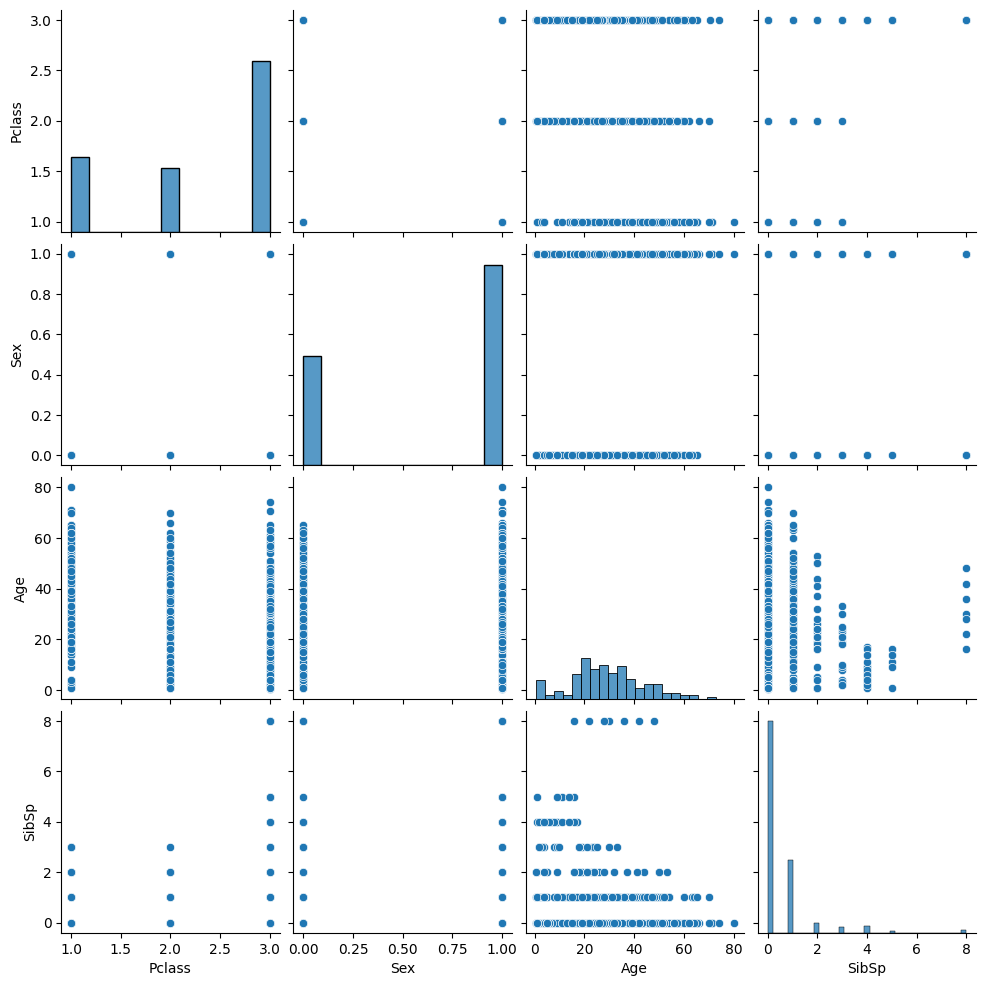

In [11]:
sns.pairplot(df[['Pclass', 'Sex', 'Age', 'SibSp']])
plt.show()

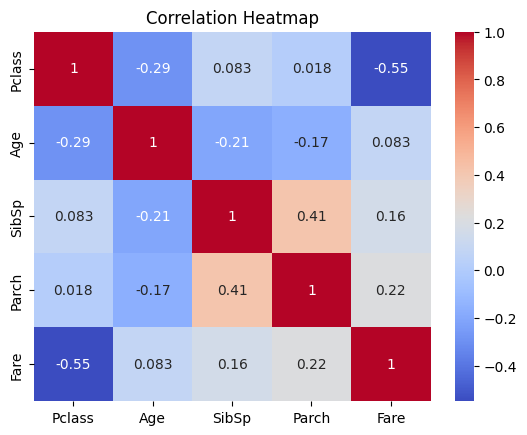

In [12]:
corr_cols = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
corr = df[corr_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()